In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
import requests

In [8]:
aapl = requests.get('http://iex.lewagon.com/stable/stock/aapl/chart/180d').json()

In [13]:
df = pd.DataFrame(aapl)
df = df[['close', 'date']]

In [15]:
df.columns = ['y', 'ds']
df.ds = pd.to_datetime(df.ds)

<AxesSubplot:xlabel='ds'>

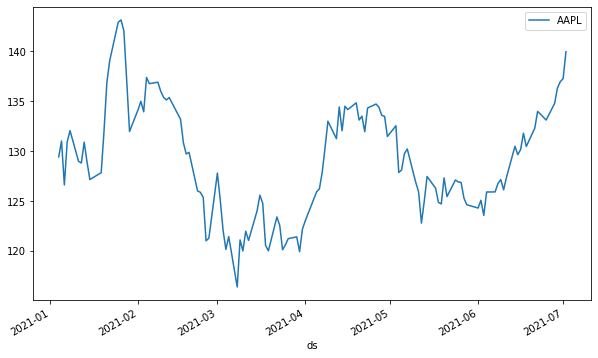

In [21]:
df.plot(x='ds', y='y', figsize=(10, 6), label='AAPL')

In [22]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Insample forecast

In [30]:
sample = df[-20:][['ds']]

In [31]:
forecast = model.predict(sample)

<AxesSubplot:xlabel='ds', ylabel='y'>

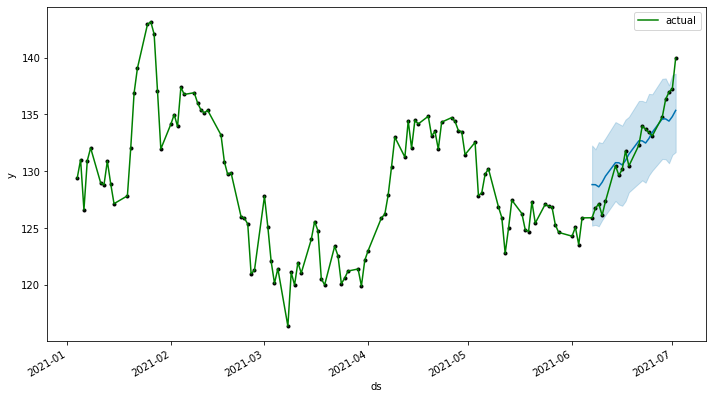

In [32]:
ax = model.plot(forecast).gca()
df.plot(ax=ax, x='ds', y='y', label='actual', color='g')

# Outsample forecast

In [33]:
future = model.make_future_dataframe(freq='D', periods=30)

In [34]:
forecast = model.predict(future)

In [40]:
forecast.tail(5)

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
151 2021-07-28  142.356514  136.584509  147.915546   137.809131   146.872502   
152 2021-07-29  142.632266  136.231407  147.871878   137.826866   147.405179   
153 2021-07-30  142.908019  136.905669  148.895408   137.800371   147.947320   
154 2021-07-31  143.183771  136.648157  149.154596   137.780103   148.432464   
155 2021-08-01  143.459523  136.819182  149.720728   137.752603   149.041617   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
151       -0.224295             -0.224295             -0.224295 -0.224295   
152       -0.100892             -0.100892             -0.100892 -0.100892   
153        0.168851              0.168851              0.168851  0.168851   
154       -0.306994             -0.306994             -0.306994 -0.306994   
155       -0.306994             -0.306994             -0.306994 -0.306994   

     weekly_lower  weekly_upper  multiplicative_terms  \
151     -0.224295     -0.224295                   0.0   
152     -0.100892     -0.100892                   0.0   
153      0.168851      0.168851                   0.0   
154     -0.306994     -0.306994                   0.0   
155     -0.306994     -0.306994                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper        yhat  
151                         0.0                         0.0  142.132219  
152                         0.0                         0.0  142.531375  
153                         0.0                         0.0  143.076869  
154                         0.0                         0.0  142.876777  
155                         0.0                         0.0  143.152529

# Plotting predictions

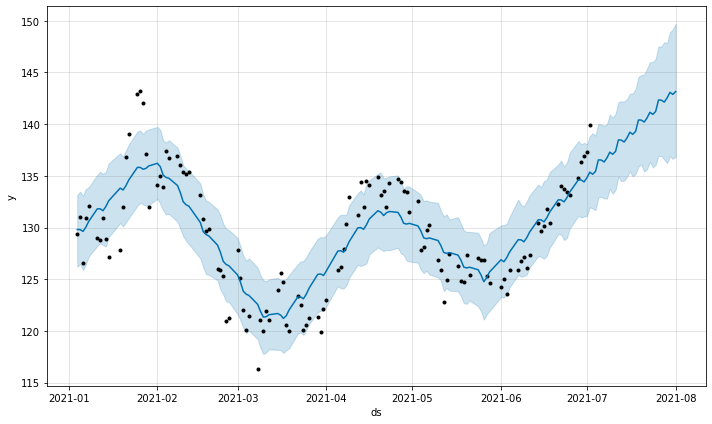

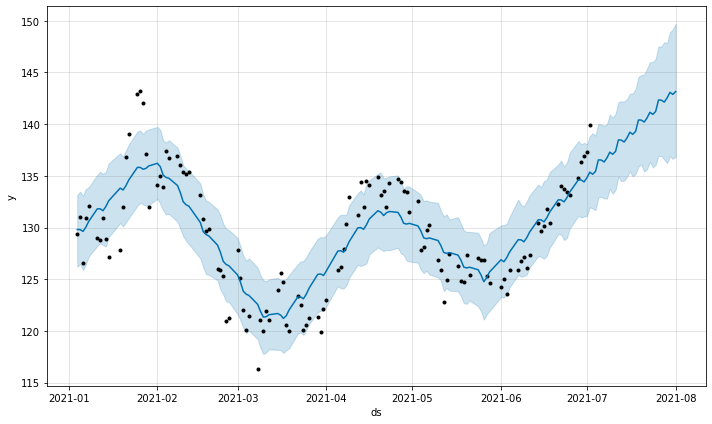

In [36]:
model.plot(forecast)

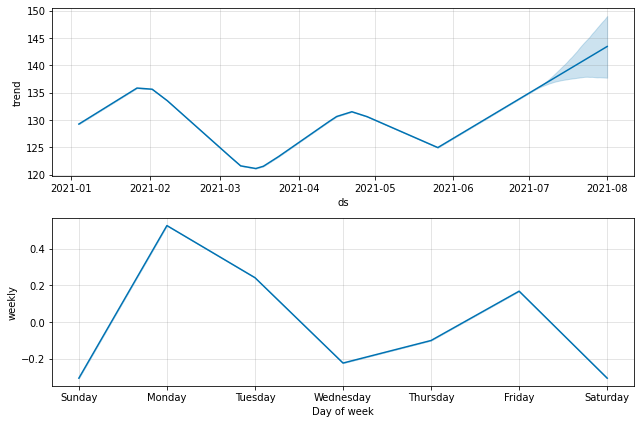

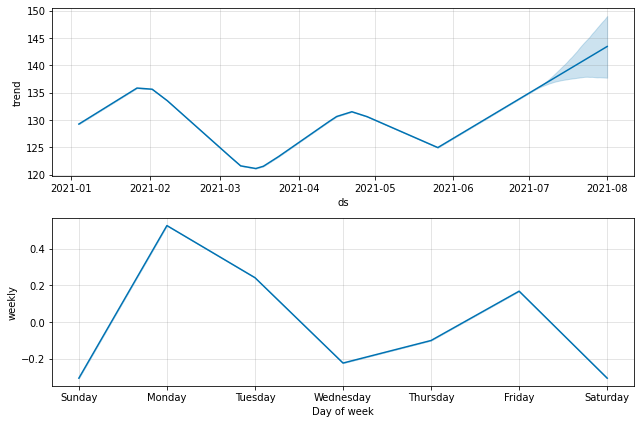

In [37]:
model.plot_components(forecast)

In [38]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

# Model Performance

Only applies to historic data (duh)

In [41]:
from prophet.diagnostics import cross_validation

In [56]:
df_cv = cross_validation(model, horizon = '30 days')

INFO:prophet:Making 4 forecasts with cutoffs between 2021-04-18 00:00:00 and 2021-06-02 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

In [57]:
df_cv

ds        yhat  yhat_lower  yhat_upper       y     cutoff
0  2021-04-19  134.988617  131.534460  138.360729  134.84 2021-04-18
1  2021-04-20  135.537768  132.044406  138.851755  133.11 2021-04-18
2  2021-04-21  135.347358  131.715918  138.787559  133.50 2021-04-18
3  2021-04-22  135.977616  132.494228  139.284121  131.94 2021-04-18
4  2021-04-23  136.557289  133.014442  140.280493  134.32 2021-04-18
..        ...         ...         ...         ...     ...        ...
81 2021-06-28  118.400441  113.009330  123.819457  134.78 2021-06-02
82 2021-06-29  117.864748  112.166072  123.518809  136.33 2021-06-02
83 2021-06-30  117.112093  111.359641  123.118946  136.96 2021-06-02
84 2021-07-01  117.099458  110.511716  123.225981  137.27 2021-06-02
85 2021-07-02  117.073748  110.380237  123.693582  139.96 2021-06-02

[86 rows x 6 columns]

# Let's visualize the differences

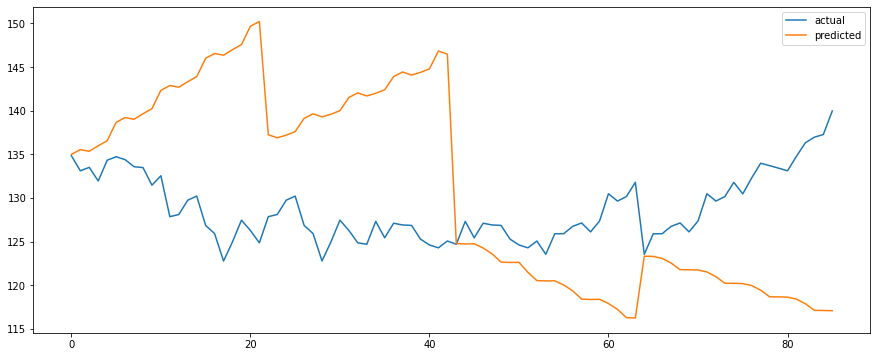

In [58]:
plt.figure(figsize=(15,6))
plt.plot(df_cv.y, label='actual')
plt.plot(df_cv.yhat, label='predicted')
plt.legend();

# Diagnose (metrics)

In [59]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.round()

horizon    mse  rmse   mae  mape  mdape  smape  coverage
0   2 days   23.0   5.0   3.0   0.0    0.0    0.0       1.0
1   3 days   22.0   5.0   4.0   0.0    0.0    0.0       1.0
2   4 days   25.0   5.0   4.0   0.0    0.0    0.0       1.0
3   5 days   21.0   5.0   4.0   0.0    0.0    0.0       1.0
4   6 days   19.0   4.0   4.0   0.0    0.0    0.0       1.0
5   7 days   33.0   6.0   5.0   0.0    0.0    0.0       0.0
6   8 days   55.0   7.0   6.0   0.0    0.0    0.0       0.0
7   9 days   72.0   8.0   7.0   0.0    0.0    0.0       0.0
8  10 days   80.0   9.0   7.0   0.0    0.0    0.0       0.0
9  11 days   87.0   9.0   8.0   0.0    0.0    0.0       0.0
10 12 days   85.0   9.0   8.0   0.0    0.0    0.0       0.0
11 13 days   84.0   9.0   8.0   0.0    0.0    0.0       0.0
12 14 days   96.0  10.0   9.0   0.0    0.0    0.0       0.0
13 15 days  120.0  11.0  10.0   0.0    0.0    0.0       0.0
14 16 days  147.0  12.0  11.0   0.0    0.0    0.0       0.0
15 17 days  153.0  12.0  11.0   0.0    0.0    0.0       0.0
16 18 days  175.0  13.0  12.0   0.0    0.0    0.0       0.0
17 19 days  178.0  13.0  13.0   0.0    0.0    0.0       0.0
18 20 days  170.0  13.0  13.0   0.0    0.0    0.0       0.0
19 21 days  173.0  13.0  13.0   0.0    0.0    0.0       0.0
20 22 days  207.0  14.0  14.0   0.0    0.0    0.0       0.0
21 23 days  245.0  16.0  15.0   0.0    0.0    0.0       0.0
22 24 days  280.0  17.0  16.0   0.0    0.0    0.0       0.0
23 25 days  330.0  18.0  17.0   0.0    0.0    0.0       0.0
24 26 days  352.0  19.0  18.0   0.0    0.0    0.0       0.0
25 27 days  342.0  18.0  18.0   0.0    0.0    0.0       0.0
26 28 days  327.0  18.0  18.0   0.0    0.0    0.0       0.0
27 29 days  338.0  18.0  18.0   0.0    0.0    0.0       0.0
28 30 days  441.0  21.0  21.0   0.0    0.0    0.0       0.0

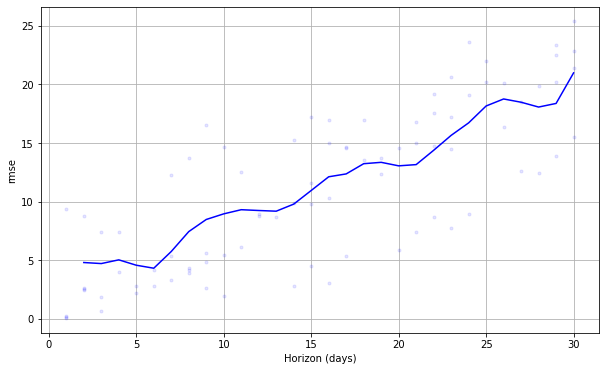

In [60]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

**Note:** errors kinda make sense - we have a pretty decent predictor from 2-7 days ahead, then it grows

# What if we do MOAR data! Let's try to get more AAPL stock historic days

In [67]:
aapl = requests.get('http://iex.lewagon.com/stable/stock/aapl/chart/900d').json()

We now have **622 rows** vs. **124** in the previous one

In [69]:
df = pd.DataFrame(aapl)
df = df[['close', 'date']]

In [70]:
df.columns = ['y', 'ds']
df.ds = pd.to_datetime(df.ds)

<AxesSubplot:xlabel='ds'>

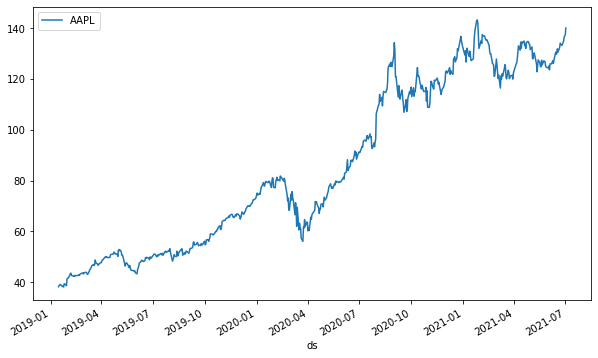

In [71]:
df.plot(x='ds', y='y', figsize=(10, 6), label='AAPL')

In [72]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Insample forecast (60 days)

In [76]:
sample = df[-60:][['ds']]

In [77]:
forecast = model.predict(sample)

<AxesSubplot:xlabel='ds', ylabel='y'>

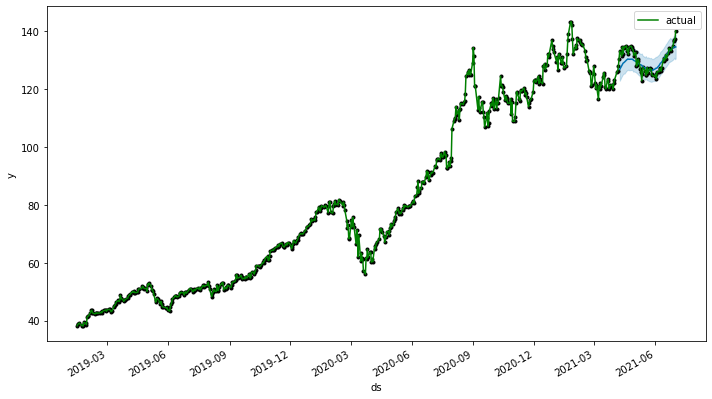

In [78]:
ax = model.plot(forecast).gca()
df.plot(ax=ax, x='ds', y='y', label='actual', color='g')

# Outsample forecast (90 days)

In [79]:
future = model.make_future_dataframe(freq='D', periods=90)

In [80]:
forecast = model.predict(future)

In [106]:
forecast.tail(85)

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
627 2021-07-08  139.532656  130.984369  138.660891   139.532656   139.532656   
628 2021-07-09  139.612850  130.708952  138.382361   139.612850   139.612850   
629 2021-07-10  139.693044  136.873566  144.809074   139.693044   139.693044   
630 2021-07-11  139.773239  136.868492  144.377303   139.766774   139.785424   
631 2021-07-12  139.853433  130.564529  138.465531   139.828215   139.880569   
..         ...         ...         ...         ...          ...          ...   
707 2021-09-26  145.948197  140.893441  154.386003   140.431839   151.270068   
708 2021-09-27  146.028391  135.249116  149.108526   140.414679   151.473467   
709 2021-09-28  146.108586  135.079174  149.123410   140.408851   151.662162   
710 2021-09-29  146.188780  136.079141  149.874852   140.406443   151.882214   
711 2021-09-30  146.268974  135.914476  149.872614   140.360679   152.048186   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
627       -4.837120             -4.837120             -4.837120 -1.736352   
628       -5.003289             -5.003289             -5.003289 -1.829416   
629        1.057183              1.057183              1.057183  4.305281   
630        0.983473              0.983473              0.983473  4.305281   
631       -5.153921             -5.153921             -5.153921 -1.760411   
..              ...                   ...                   ...       ...   
707        1.867707              1.867707              1.867707  4.305281   
708       -4.010610             -4.010610             -4.010610 -1.760411   
709       -3.712091             -3.712091             -3.712091 -1.690307   
710       -3.353632             -3.353632             -3.353632 -1.594075   
711       -3.207626             -3.207626             -3.207626 -1.736352   

     weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
627     -1.736352     -1.736352 -3.100768     -3.100768     -3.100768   
628     -1.829416     -1.829416 -3.173873     -3.173873     -3.173873   
629      4.305281      4.305281 -3.248098     -3.248098     -3.248098   
630      4.305281      4.305281 -3.321808     -3.321808     -3.321808   
631     -1.760411     -1.760411 -3.393510     -3.393510     -3.393510   
..            ...           ...       ...           ...           ...   
707      4.305281      4.305281 -2.437574     -2.437574     -2.437574   
708     -1.760411     -1.760411 -2.250199     -2.250199     -2.250199   
709     -1.690307     -1.690307 -2.021784     -2.021784     -2.021784   
710     -1.594075     -1.594075 -1.759557     -1.759557     -1.759557   
711     -1.736352     -1.736352 -1.471274     -1.471274     -1.471274   

     multiplicative_terms  multiplicative_terms_lower  \
627                   0.0                         0.0   
628                   0.0                         0.0   
629                   0.0                         0.0   
630                   0.0                         0.0   
631                   0.0                         0.0   
..                    ...                         ...   
707                   0.0                         0.0   
708                   0.0                         0.0   
709                   0.0                         0.0   
710                   0.0                         0.0   
711                   0.0                         0.0   

     multiplicative_terms_upper        yhat  
627                         0.0  134.695536  
628                         0.0  134.609561  
629                         0.0  140.750227  
630                         0.0  140.756712  
631                         0.0  134.699512  
..                          ...         ...  
707                         0.0  147.815904  
708                         0.0  142.017782  
709                         0.0  142.396494  
710                         0.0  142.835148  
711                         0.0  143.061348  

[85 rows x 

# Plotting predictions

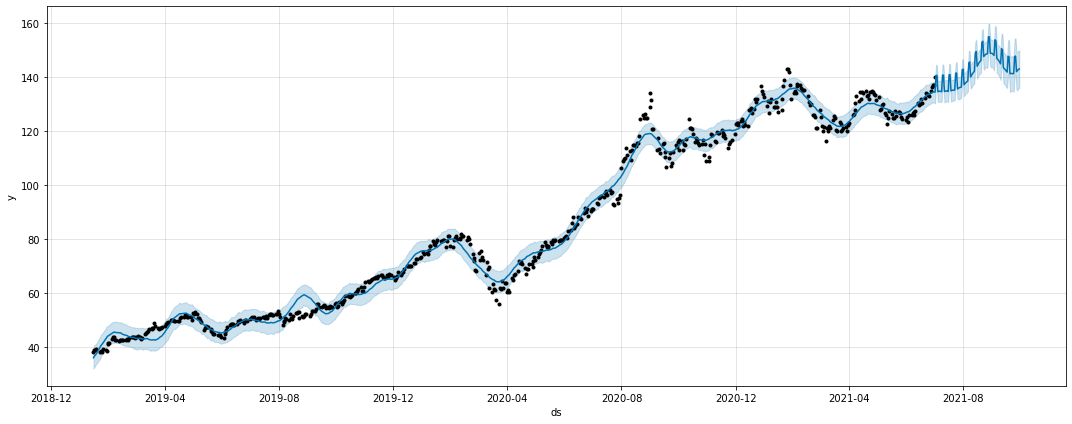

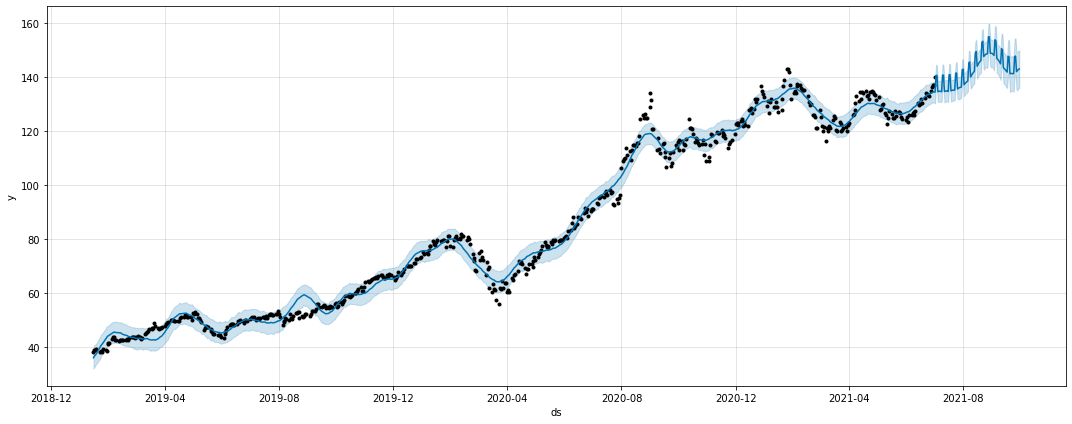

In [83]:
model.plot(forecast, figsize=(15,6))

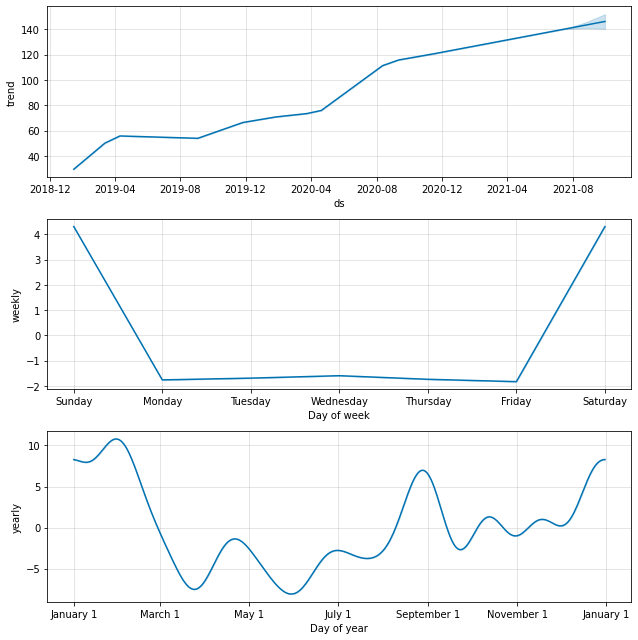

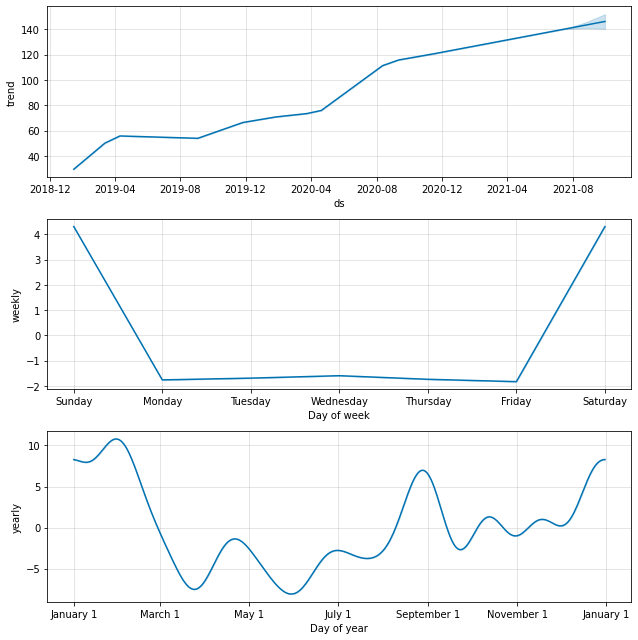

In [84]:
model.plot_components(forecast)

In [85]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

# Model Performance

Only applies to historic data (duh)

In [41]:
from prophet.diagnostics import cross_validation

In [94]:
df_cv10days = cross_validation(model, horizon = '90 days', period='10 days')

INFO:prophet:Making 45 forecasts with cutoffs between 2020-01-19 00:00:00 and 2021-04-03 00:00:00


  0%|          | 0/45 [00:00<?, ?it/s]

In [91]:
df_nodup = df_cv2.drop_duplicates(subset='ds')

# Let's visualize the differences

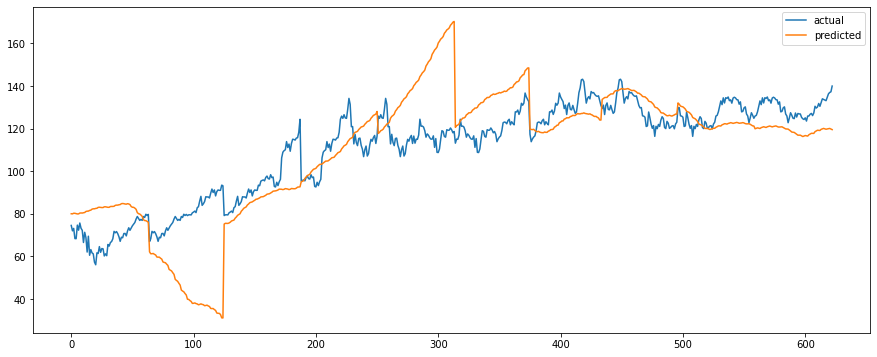

In [92]:
plt.figure(figsize=(15,6))
plt.plot(df_cv2.y, label='actual')
plt.plot(df_cv2.yhat, label='predicted')
plt.legend();

# Let's visualize differences (no duplicate dates)

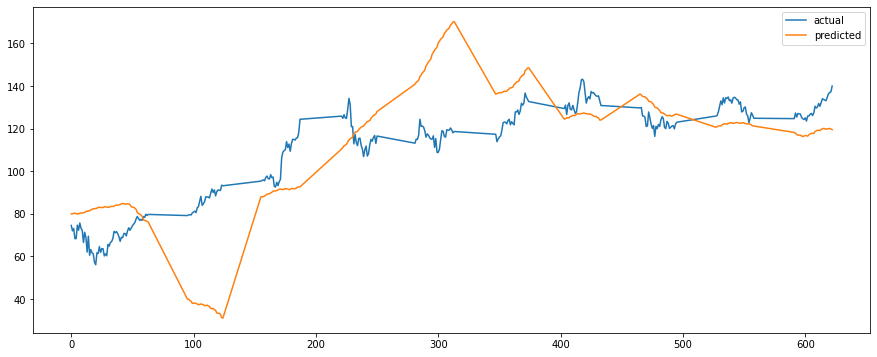

In [93]:
plt.figure(figsize=(15,6))
plt.plot(df_nodup.y, label='actual')
plt.plot(df_nodup.yhat, label='predicted')
plt.legend();

# Let's visualize differences (decreasing period to 10 days)

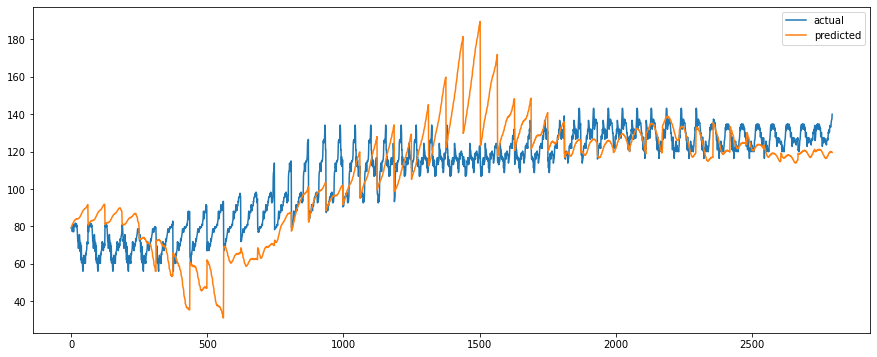

In [95]:
plt.figure(figsize=(15,6))
plt.plot(df_cv10days.y, label='actual')
plt.plot(df_cv10days.yhat, label='predicted')
plt.legend();

# Diagnose (metrics)

In [96]:
from prophet.diagnostics import performance_metrics
df_p2 = performance_metrics(df_cv2)
df_p2.round()

horizon    mse  rmse   mae  mape  mdape  smape  coverage
0   9 days   41.0   6.0   6.0   0.0    0.0    0.0       0.0
1  10 days   44.0   7.0   6.0   0.0    0.0    0.0       0.0
2  11 days   48.0   7.0   6.0   0.0    0.0    0.0       0.0
3  12 days   52.0   7.0   6.0   0.0    0.0    0.0       0.0
4  13 days   51.0   7.0   6.0   0.0    0.0    0.0       0.0
..     ...    ...   ...   ...   ...    ...    ...       ...
77 86 days  604.0  25.0  17.0   0.0    0.0    0.0       0.0
78 87 days  602.0  25.0  18.0   0.0    0.0    0.0       0.0
79 88 days  615.0  25.0  18.0   0.0    0.0    0.0       0.0
80 89 days  686.0  26.0  19.0   0.0    0.0    0.0       0.0
81 90 days  758.0  28.0  20.0   0.0    0.0    0.0       0.0

[82 rows x 8 columns]

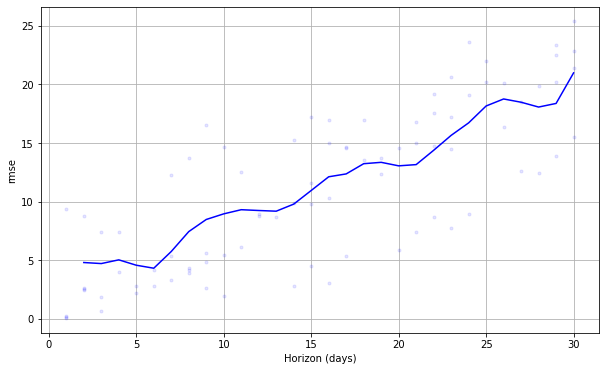

In [60]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

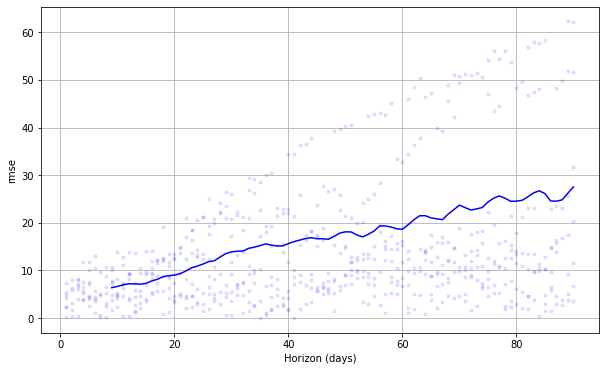

In [97]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv2, metric='rmse')

**Note**: with the small dataset our 'rmse':
- at 10 days - 10
- at 30 days - 21

Big dataset:

- at 10 days - 7
- at 30 days - 15

In [98]:
df_p.mean() # small data

horizon     16 days 00:00:00
mse               161.426034
rmse               11.707381
mae                10.862639
mape                0.084696
mdape               0.084222
smape               0.082682
coverage            0.183549
dtype: object

In [99]:
df_p2.mean() # big data :P

horizon     49 days 12:00:00
mse               336.252619
rmse               17.334548
mae                13.633785
mape                0.136831
mdape               0.084716
smape               0.145662
coverage            0.150017
dtype: object